In [61]:
import pandas as pd
import numpy as np
import statistics
import sklearn
import warnings
#import missingno as msno
#warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
from math import sqrt


from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report


#%matplotlib inline
#import matplotlib as mp
import matplotlib.pyplot as plt
#import seaborn as sns 
#import scipy.stats as scs
#import scipy.stats as stats

import statsmodels.api as sm
from datetime import date, datetime, time

#Input and Read Data
#Input
df_bankdata=pd.read_csv('bank-full.csv',delimiter=';')

In [62]:
df_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [63]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [64]:
#Check to see if there are any null values 
df_bankdata.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [65]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


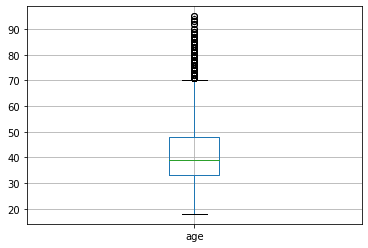

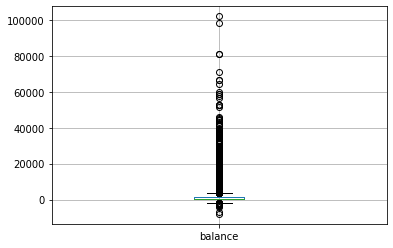

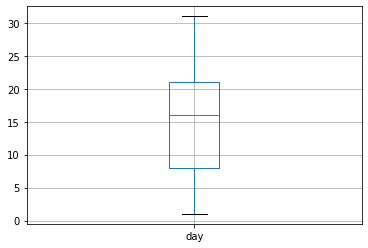

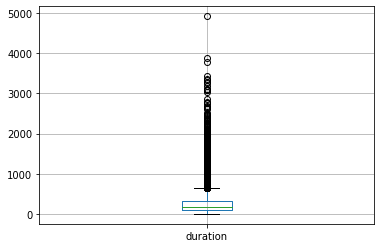

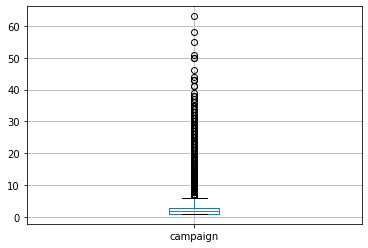

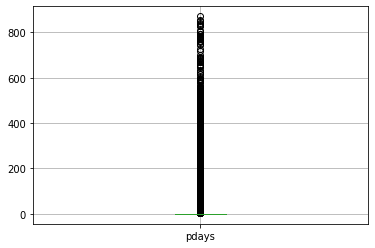

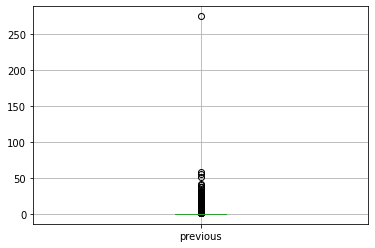

In [66]:
Numerical_column = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
for i in (Numerical_column):
    df_bankdata.boxplot(column=[i])
    plt.show()

In [67]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age


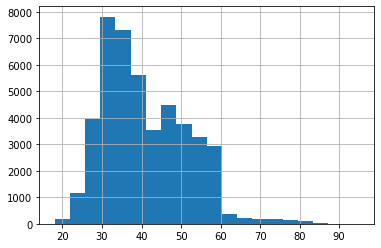

balance


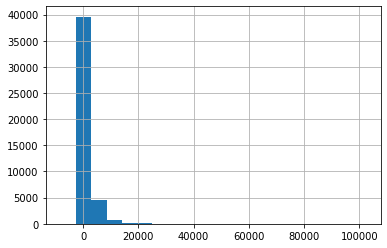

day


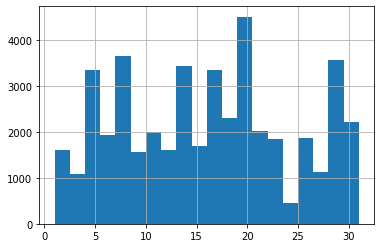

duration


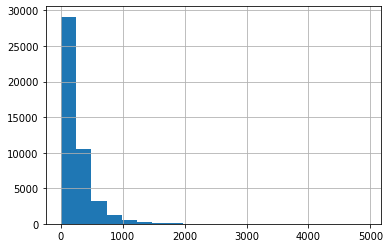

campaign


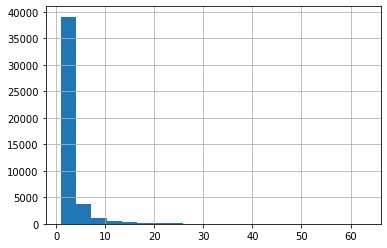

pdays


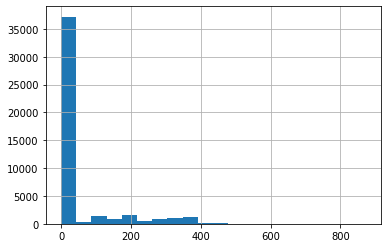

previous


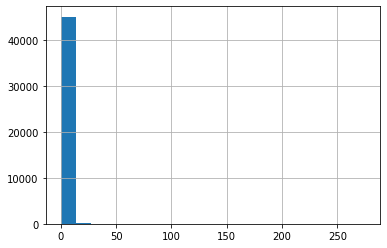

In [68]:
#To better observe data I can graph it and visually understand.
#I graph histograms of the data to gather insights

for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [69]:
for num in (Numerical_column):
    #print("Log"+num)
    df_bankdata["Log"+num] = df_bankdata[num].map(lambda i: np.log(i) if i > 0 else 0) 
    print(num, df_bankdata[num].skew())
    print("Log"+num, df_bankdata["Log"+num].skew())

age 0.6848179257252598
Logage 0.0989014480878478
balance 8.360308326166326
Logbalance -0.8614392203590333
day 0.09307901402122411
Logday -1.073595605645062
duration 3.144318099423456
Logduration -0.5066496877758495
campaign 4.898650166179675
Logcampaign 0.8802108957712975
pdays 2.6157154736563477
Logpdays 1.7129722110271126
previous 41.84645447266292
Logprevious 3.4205071766451938


In [70]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous,Logage,Logbalance,Logday,Logduration,Logcampaign,Logpdays,Logprevious
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,3.679433,5.305018,2.561803,5.162219,0.706819,0.954961,0.149664
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.254577,2.798657,0.713012,0.933751,0.712172,2.045435,0.451112
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.496508,4.276666,2.079442,4.634729,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.663562,6.104793,2.772589,5.192957,0.693147,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,3.871201,7.264030,3.044522,5.765191,1.098612,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,4.553877,11.533972,3.433987,8.500657,4.143135,6.769642,5.616771


age


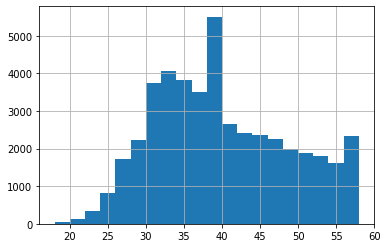

balance


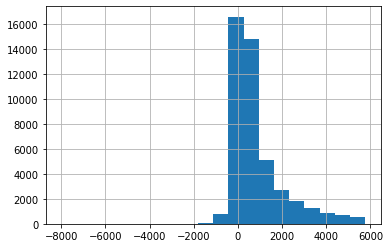

day


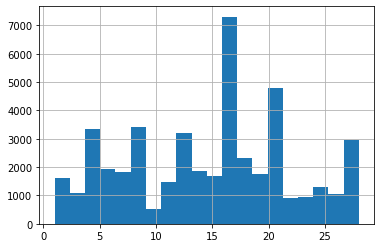

duration


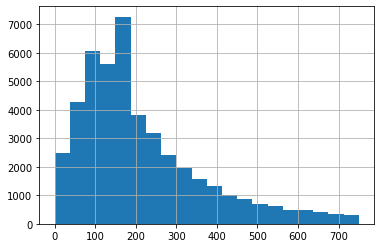

campaign


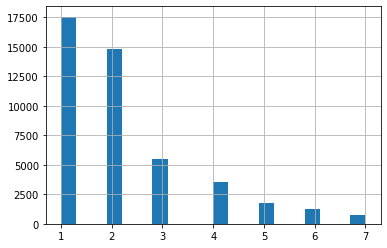

pdays


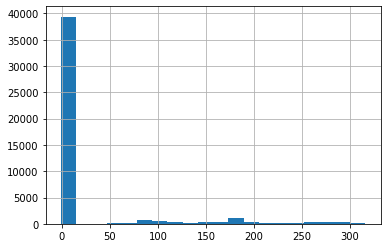

previous


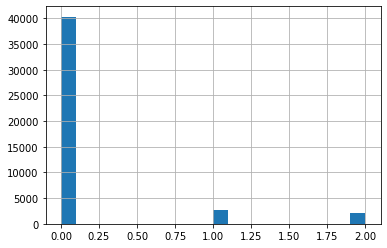

In [72]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [73]:
for num in (Numerical_column):
    print(num + ' median', df_bankdata[num].quantile(0.50)) 
    print(num + ' outlier', df_bankdata[num].quantile(0.95)) 
    df_bankdata[num] = np.where(df_bankdata[num] >= df_bankdata[num].quantile(0.95), df_bankdata[num].quantile(0.50) , df_bankdata[num])
    df_bankdata.describe()
    


age median 39.0
age outlier 56.0
balance median 448.0
balance outlier 3573.5
day median 16.0
day outlier 27.0
duration median 180.0
duration outlier 547.0
campaign median 2.0
campaign outlier 5.0
pdays median -1.0
pdays outlier 185.0
previous median 0.0
previous outlier 1.0


age


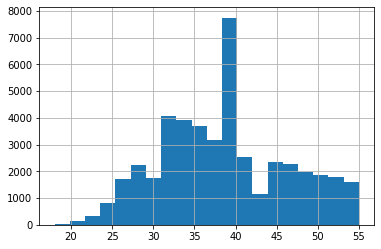

balance


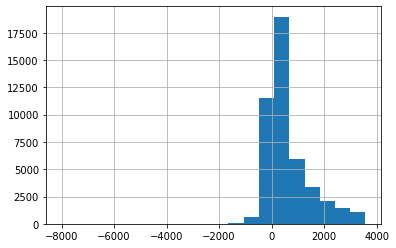

day


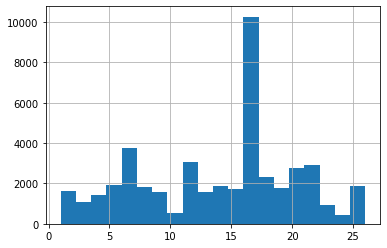

duration


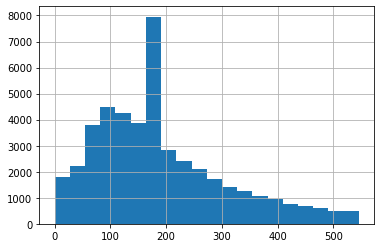

campaign


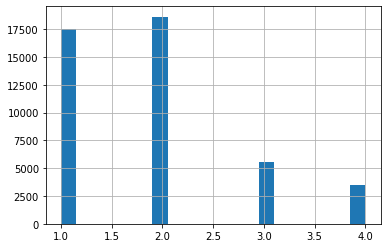

pdays


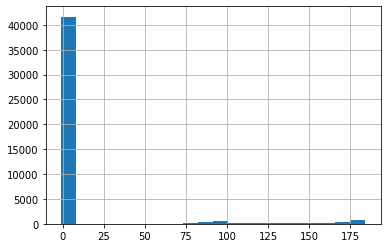

previous


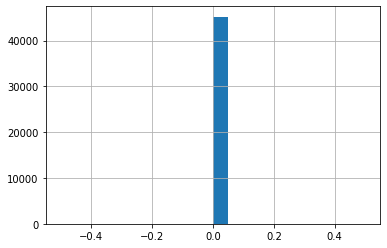

In [74]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()